Channels
Data
Instrument config
Instruments
Log list
Settings
Step config
Step list
Tags
Traces


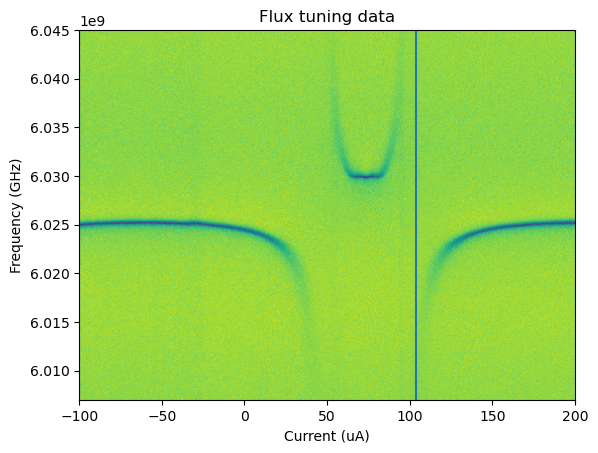

(1001, 501)
(340,)
(1001,)
(1001, 340)


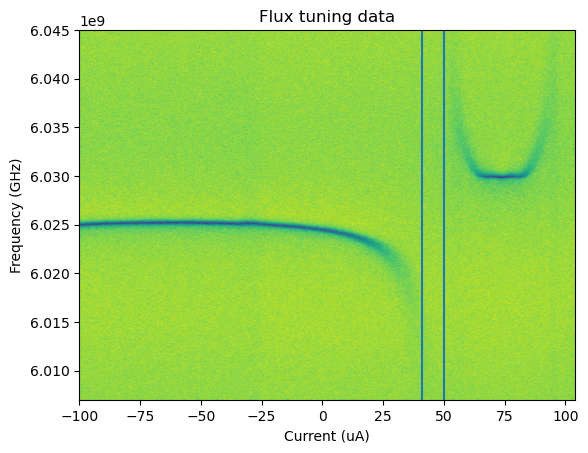

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import cmath
from scipy.optimize import curve_fit
import math

#sys.path.append("..\lflPython\fitTools")
from fitTools.Resonator import Resonator
datapath = 'G:\\Shared drives\\LFL\\Labber\\Data\\2023\\04\\Data_0405\\'
f_name = 'diss09_6024_fine_flux_sweep.hdf5'

f = h5py.File(datapath + f_name,'r')

for key in f.keys():
    print(key)

s21 = f['Traces']['Agilent Network Analyzer E5071B - S21'][()]
numsteps = f['Traces']['Agilent Network Analyzer E5071B - S21_N'][0][()]
frange = f['Traces']['Agilent Network Analyzer E5071B - S21_t0dt'][0][()]
currents = np.linspace(-100,200,501)
#guess_current = np.linspace(f['Data']['Data'])
s21_complex = s21[:,0,:]+1j*s21[:,1,:]
freqs = np.linspace(frange[0],frange[0]+frange[1]*(numsteps-1),numsteps)
freqs = freqs#1e9
plt.imshow(abs(s21_complex), aspect='auto',origin='lower',extent=(currents[0], currents[-1], freqs[0], freqs[-1]))
plt.title('Flux tuning data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.axvline(currents[0])
plt.axvline(currents[340])


plt.show() 
print(np.shape(s21_complex))
start = 0
stop = 340
fcut = freqs
s21cut = s21_complex[:,start:stop]
ccut = currents[start:stop]
plt.imshow(abs(s21cut), aspect='auto',origin='lower',extent=(currents[start], currents[stop], fcut[0], fcut[-1]))
plt.title('Flux tuning data')
plt.xlabel('Current (uA)')
plt.ylabel('Frequency (GHz)') 
plt.axvline(ccut[235])
plt.axvline(ccut[250])

print(np.shape(ccut))
print(np.shape(fcut))
print(np.shape(s21cut))

In [35]:
s21_resfit = np.zeros(340)
print(np.shape(s21cut))
for i in range(340):
    print(i)
    res = Resonator(port_type='notch',f_data=fcut,z_data=s21cut[:,i])
    if i<=235:
        res.autofit(fcrop=(6.010,6.040))
        s21_resfit[i] = res.f0
    elif i>235 and i<251:
        s21_resfit[i] = 'nan'
    else:
        res.autofit(fcrop=(6.015,6.045))
        s21_resfit[i] = res.f0

(1001, 340)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
fit error = [4.10798066e-05 4.15421223e+00 9.65192487e+00]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
212
213
fit error = [1.28661722e-02 1.01044423e+03 2.77669523e+05]
The fit could not be found, try cr

C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


224
fit error = [6.48017011e-04 9.35125498e+01 7.40817548e+02]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
225
226
fit error = [8.17227786e+11 5.65755626e+12 4.97196839e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
227
fit error = [-2.85152761e+16  4.63428790e+14  3.62782868e+29]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
228
fit error = [1.56571827e+19 1.21770175e+16 5.08511189e+33]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
229
fit error = [2.04521716e-02 9.36009923e+02 1.39975629e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
230
fit error = [3.63622011e+10 6.53095417e+11 1.02107852e+24]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
231
fit error = [2.10333357e+12 9.17096247e+13 8.89169346e+27]
The fit coul

C:\Users\LFL\lflPython\fitTools\Resonator.py:368: RuntimeWarning: invalid value encountered in sqrt
  errors = np.sqrt(np.diagonal(cov))
C:\Users\LFL\lflPython\fitTools\Resonator.py:378: RuntimeWarning: invalid value encountered in sqrt
  Qi_err =  np.sqrt(err1+2*err2)	 # including correlations


fit error = [6.46008554e+12            nan            nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
261
fit error = [0.00088159 0.27287922 0.43749953]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
fit error = [0.02612008 2.16998942 0.77513304]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
318
319
fit error = [0.01790474 1.69131121 0.84854659]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
320
fit error = [2.60376322e-02 1.97974490e+00 4.46494573e+01]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
321
fit error = [0.01473007 1.42200411 1.24893024]


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\scipy\optimize\minpack.py:476: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)
C:\Users\LFL\lflPython\fitTools\Resonator.py:317: RuntimeWarning: invalid value encountered in arcsin
  self.phi0_2 = -np.arcsin(yc/r0)
C:\Users\LFL\lflPython\fitTools\circlefit.py:423: RuntimeWarning: invalid value encountered in true_divide
  u = u/chi  # unit vector pointing in the correct direction for the derivative


fit error = [2.44884156e-05 3.04556678e+00 7.31232716e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
325
fit error = [nan nan nan]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
326
fit error = [2.74822604e-04 6.12743141e+01 3.01418340e+05]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
327
fit error = [2.97238221e-05 4.87317574e+00 1.48278373e+03]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
328
fit error = [1.27165293e-03 1.62677913e+02 1.15504742e+06]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
329
fit error = [1.63352579e+15 1.63353144e+15 3.11076688e+19]
The fit could not be found, try cropping the data with autofit(fcrop=(f1 [GHz],f2 [GHz]))
330
fit error = [1.88775295e-04 1.59475569e+01 2.20233926e+02]
The fit could not be found, try cropping the data with a

(340,)


C:\Users\LFL\Anaconda3\envs\opx-env2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


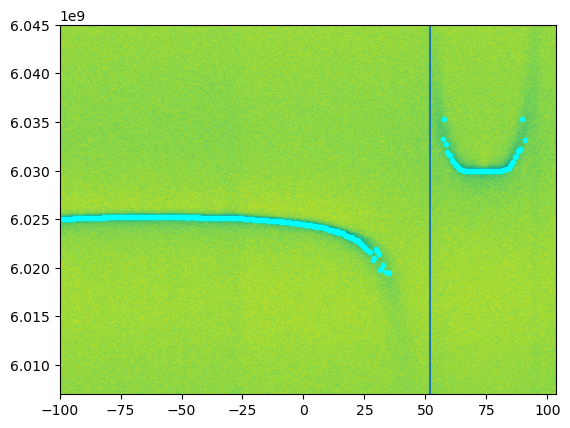

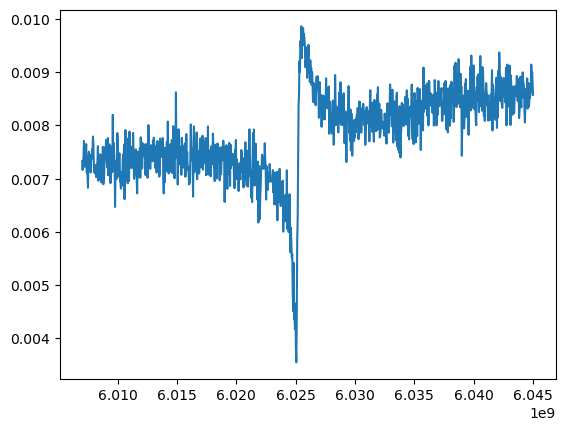

In [38]:
print(np.shape(s21_resfit))

s21_resfit[335:339] = 'nan'
plt.imshow(abs(s21cut), aspect='auto',origin='lower',extent=(ccut[0], ccut[-1], fcut[0], fcut[-1]))
plt.scatter(ccut,s21_resfit,marker='.',c='cyan')

#visualize trace of this slice 20
plt.axvline(ccut[253])
plt.figure()

plt.plot(fcut,s21cut[:,20])

(278,)
Wq_max = 11.072607021757035 GHz
Wc = 6.02631581926135 GHz
g = 0.08826072417754771 GHz
phi_offset = -0.7993108722106838
d (junction asymmetry) = -0.06606996592877393
R^2 of fit =  0.988788609905489


(6.01, 6.045)

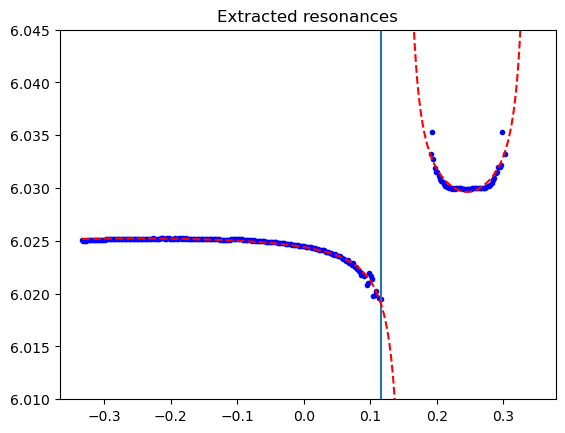

In [55]:
def avoided_crossing(x, wq_max, wc, g,phi_offset,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        flux_dep = np.emath.power(abs(np.cos(np.pi*x[i]-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x[i]-phi_offset)),2)
        wq = wq_max*np.emath.power(flux_dep, 1/4)
        if i<=221: #where the cropped lower curve ends in fitx
            y[i] = 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
        else:
            y[i] = 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
    return y

x = ccut/300 #1 flux quantum
y = s21_resfit/1e9
mask = np.isnan(y)
fitx = x[~mask]
fity=y[~mask]
plt.scatter(fitx,fity,marker='.',c='blue')
print(np.shape(fitx))
plt.title('Extracted resonances')

plt.axvline(fitx[221])


popt, pcov = curve_fit(avoided_crossing,fitx,fity,p0=[10,6.025,.09,-.5,.005])#,p0=[10,6.745,.005,1],bounds=(0,[12,7,2,1]))
#get r^2
residuals = fity-avoided_crossing(fitx,*popt)
ss_res = np.sum(residuals**2) #residual sum of squares
ss_tot = np.sum((fity - np.mean(fity))**2) #total sum of squares
r_squared = 1 - (ss_res/ss_tot)
                                                                                                 
print("Wq_max = "+str(popt[0])+" GHz")
print("Wc = "+str(popt[1])+" GHz")
print("g = "+str(popt[2])+" GHz")
print("phi_offset = "+str(popt[3]))
print("d (junction asymmetry) = "+str(popt[4]))
print("R^2 of fit = ",r_squared)

def avoided_crossing_lower(x, wq_max, wc, g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(-np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))

def avoided_crossing_upper(x, wq_max, wc, g, phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return 1/2*(np.emath.sqrt(4*g**2+(wc-wq)**2) + np.emath.sqrt(4*g**2+(wc+wq)**2))
def predict_disspator_frequency(x,wq_max,wc,g,phi_offset,d):
    flux_dep = np.emath.power(abs(np.cos(np.pi*x-phi_offset)),2) + d**2*np.emath.power(abs(np.sin(np.pi*x-phi_offset)),2)
    wq = wq_max*np.emath.power(flux_dep, 1/4)
    return wq
plt.plot(x,avoided_crossing_lower(x,*popt),'r--')
plt.plot(x,avoided_crossing_upper(x,*popt),'r--')
plt.ylim([6.01,6.045])

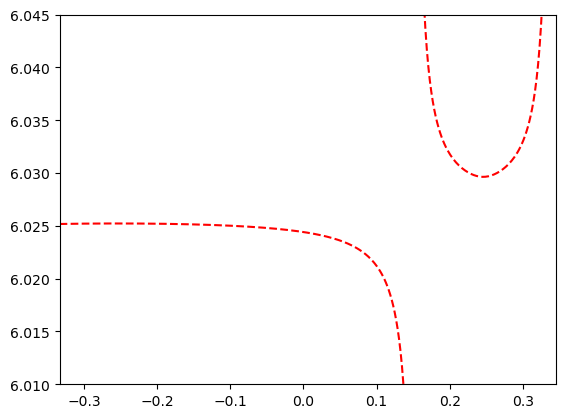

In [57]:
plt.imshow(abs(s21cut), aspect='auto',origin='lower',extent=(x[0], x[-1], fcut[0], fcut[-1]))
plt.plot(x,avoided_crossing_lower(x,*popt),'r--')
plt.plot(x,avoided_crossing_upper(x,*popt),'r--')
plt.ylim([6.01,6.045])
plt.show()

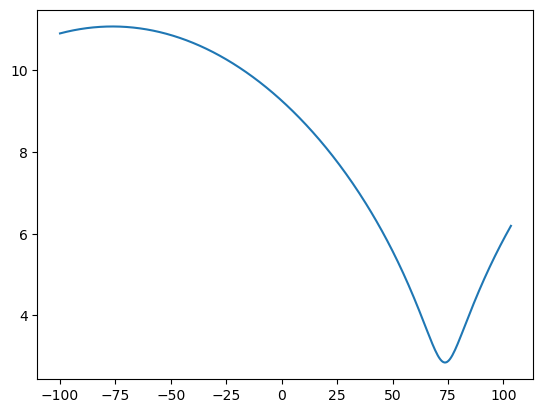

In [58]:
plt.plot(x*300,predict_disspator_frequency(x,*popt))


In [59]:
predict_disspator_frequency(-25/300,*popt)-predict_disspator_frequency(-10/300,*popt)

0.6000202072608634

In [80]:
predict_disspator_frequency(16/300,*popt)

8.363174903245344

In [84]:
avoided_crossing_upper(21/300,*popt)

8.042864415391705

In [23]:
predict_disspator_frequency(15/265,*popt)-predict_disspator_frequency(18/265,*popt)

0.16758964389007858

In [24]:
predict_disspator_frequency(15/265,*popt)

8.543285785496463